In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-future-prices/future-gc00-daily-prices.csv


In [3]:
df = pd.read_csv('/kaggle/input/gold-future-prices/future-gc00-daily-prices.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close
0,01/02/2013,"1,676.40","1,695.40","1,670.90","1,688.80"
1,01/02/2014,"1,204.50","1,230.80","1,202.50","1,225.20"
2,01/02/2015,"1,184.00","1,194.90","1,167.30","1,186.20"
3,01/02/2018,"1,305.30","1,320.40","1,304.60","1,316.10"
4,01/02/2019,"1,285.00","1,291.00","1,280.60","1,284.10"


In [5]:
df.describe()

,Date,Open,High,Low,Close
count,3703,3703,3703,3703,3703
unique,3703,2930,2976,2990,2975
top,01/02/2013,"1,782.00","1,283.90","1,272.00","1,317.80"
freq,1,6,6,6,6


In [6]:
df.Date = pd.to_datetime(df.Date)

In [7]:
print('Records: ',df.shape[0])

Records:  3703


In [8]:
df.High = df.High.apply(lambda a: a.replace(',','')).astype('float64')
df.Low = df.Low.apply(lambda a: a.replace(',','')).astype('float64')
df.Open= df.Open.apply(lambda a: a.replace(',','')).astype('float64')
df.Close = df.Close.apply(lambda a: a.replace(',','')).astype('float64')


In [9]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [10]:
df.shape[0]

3703

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3703 non-null   datetime64[ns]
 1   Open    3703 non-null   float64       
 2   High    3703 non-null   float64       
 3   Low     3703 non-null   float64       
 4   Close   3703 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 144.8 KB


In [12]:
df['diff_high_low'] = df['High']-df['Low']

In [13]:
df['open_close_ratio'] = df['Open']/df['Close']
df['percent_increase(%)'] = (df['Close']-df['Open'])/df['Open']

In [14]:
df.columns = map(str.lower,df.columns)

In [15]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name().apply(lambda a: a[:3])

In [16]:
df.head()

,date,open,high,low,close,diff_high_low,open_close_ratio,percent_increase(%),year,month
0,2013-01-02,1676.4,1695.4,1670.9,1688.8,24.5,0.992658,0.007397,2013,Jan
1,2014-01-02,1204.5,1230.8,1202.5,1225.2,28.3,0.983105,0.017186,2014,Jan
2,2015-01-02,1184.0,1194.9,1167.3,1186.2,27.6,0.998145,0.001858,2015,Jan
3,2018-01-02,1305.3,1320.4,1304.6,1316.1,15.8,0.991794,0.008274,2018,Jan
4,2019-01-02,1285.0,1291.0,1280.6,1284.1,10.4,1.000701,-0.000700,2019,Jan


<Axes: title={'center': 'Percent Increase of Price per Year'}, xlabel='year', ylabel='Percent Increase'>

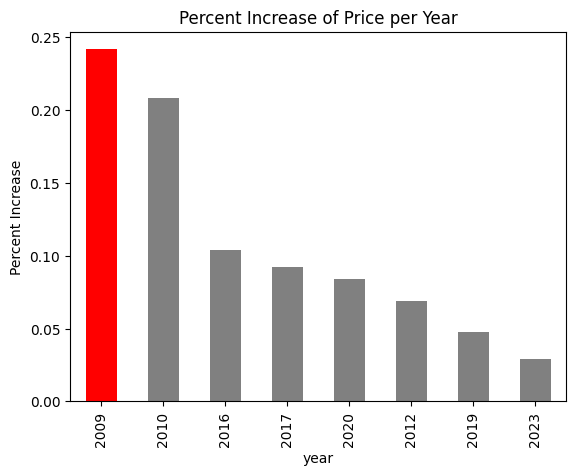

In [17]:
df.groupby('year')['percent_increase(%)'].sum().sort_values(ascending=False).iloc[:8].plot(kind='bar', ylabel='Percent Increase',title='Percent Increase of Price per Year', color=['red']+['grey']*7)

Text(0.5, 1.0, 'Average difference in High and Low prices per year')

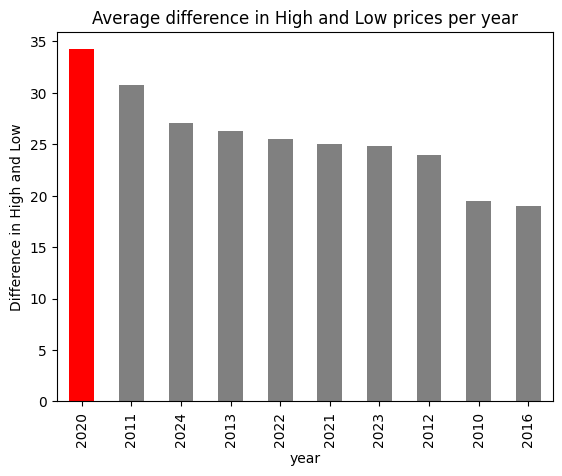

In [37]:
df.groupby('year')['diff_high_low'].mean().sort_values(ascending=False).iloc[:10].plot(kind='bar',color=['red']+['grey']*9)
plt.ylabel('Difference in High and Low')
plt.title('Average difference in High and Low prices per year')

In [38]:
years = df.year.unique()
years_df = {}
for i in years:
    years_df[i] = df.loc[df.year==i]

In [59]:
years_var = ['_'+str(i) for i in years]
years_list =[]
for i in years_var:
    j=int(i.strip('_'))
    i = pd.DataFrame(years_df[j])
    years_list.append(i)

In [61]:
years_list[0]

,date,open,high,low,close,diff_high_low,open_close_ratio,percent_increase(%),year,month
0,2013-01-02,1676.4,1695.4,1670.9,1688.8,24.5,0.992658,0.007397,2013,Jan
9,2013-01-03,1686.2,1690.5,1661.2,1674.6,29.3,1.006927,-0.006879,2013,Jan
21,2013-01-04,1663.8,1664.5,1626.0,1648.9,38.5,1.009036,-0.008955,2013,Jan
54,2013-01-07,1656.3,1663.0,1642.6,1646.3,20.4,1.006074,-0.006038,2013,Jan
63,2013-01-08,1647.6,1662.7,1646.8,1662.2,15.9,0.991216,0.008861,2013,Jan
...,...,...,...,...,...,...,...,...,...,...
3635,2013-12-24,1197.8,1205.1,1195.5,1203.3,9.6,0.995429,0.004592,2013,Dec
3642,2013-12-26,1203.8,1215.4,1200.5,1212.3,14.9,0.992989,0.007061,2013,Dec
3651,2013-12-27,1210.9,1218.9,1208.5,1214.0,10.4,0.997446,0.002560,2013,Dec
3685,2013-12-30,1213.8,1215.8,1193.3,1203.8,22.5,1.008307,-0.008239,2013,Dec


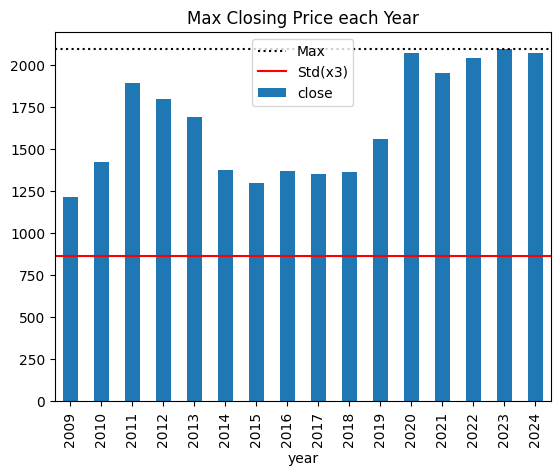

In [70]:
df.groupby('year')['close'].max().plot(kind='bar',title='Max Closing Price each Year')
plt.axhline(df.close.max(), linestyle=':',color='black', label='Max')
plt.axhline(df.close.std()*3,color='red',label='Std(x3)')
plt.legend()

Steady increase from 2009 to 2011, then a decline between 2011 and 2018 before it bounces back up in recent years.

(array([2007.5, 2010. , 2012.5, 2015. , 2017.5, 2020. , 2022.5, 2025. ]),
 [Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2022.5, 0, '2022.5'),
  Text(2025.0, 0, '2025.0')])

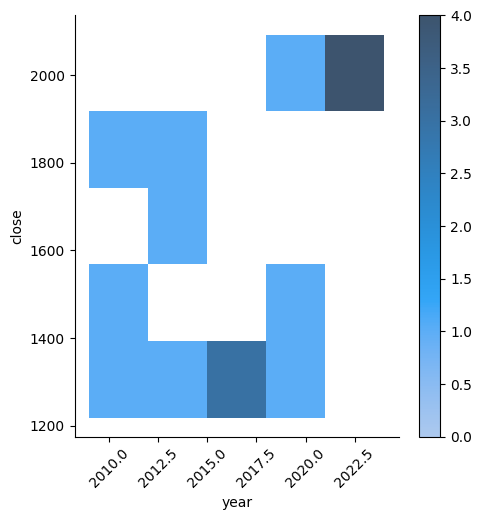

In [95]:
xx=df.groupby('year')['close'].max().reset_index()
sns.displot(x=xx.year,y=xx.close, cbar=True,)
plt.xticks(rotation=45)